In [17]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore")
rng = np.random.default_rng(1729)

# Fill Queue (Poisson)

## The Filling Method

In this approach, we will seek fill every team as the parties arrive

In [18]:
def FillWaitTime(line):
    last_val = line[len(line) - 1][0]
    waits = []
    for i in range(len(line)):
        temp = line[i]
        waits.append(last_val - temp[0])
    return sum(waits)/len(waits)

def FillWeightTime(line):
    last_val = line[len(line) - 1]
    waits = []
    for i in range(len(line)):
        temp = line[i]
        waits.append((last_val[0]-temp[0])*temp[1])
    return sum(waits)/5

        

def CreatePartyFill(arrivals,sizes):
    c_arr = np.cumsum(arrivals)
    df = pd.DataFrame({'Arrival Time': c_arr, 'Party Size': sizes, 'Time Passed':arrivals})

    waits = []
    weights = []
    lines = []
    fulls = []

    for i in range(len(arrivals)):
        val = df.iloc[i]
        party = int(val[1])
        
        # if the party size is 5, mark wait time as zero
        if party == 5:
            waits.append(0)
            weights.append(0)
            fulls.append([val])
            continue

        added = False

        # if there are no groups waiting to be filled, create one
        if lines == []:
            lines.append([val])
            continue
        
        # loop thru all groups waiting
        for x in range(len(lines)):

            # find size of this group
            group = lines[x]
            temp = 0
            for g in group:
                temp += g[1]

            # if adding this party exceeds 5, go to next one
            if (temp + party) > 5:
                continue

            # if adding this party equals 5, pop it and add the mean wait time of everyone
            # and exit loop
            elif (temp + party) == 5:
                lines[x].append(val)
                temp = lines.pop(x)
                waits.append(FillWaitTime(temp))
                weights.append(FillWeightTime(temp))
                fulls.append(temp)
                added = True
                break

            # if this group has room for another party add them
            # and exit loop
            elif (temp + party) < 5:
                lines[x].append(val)
                added = True
                break
        
        # if no one was added to the party, make a new group
        if (added == False):
            lines.append([val])

    return waits,weights,lines,fulls

### Poisson Function

In [19]:
def PoissonClean(N,lamb):
    arr = rng.poisson(lamb, size=N)
    for i in range(N):
        if arr[i] == 0:
            arr[i] = 1
        if arr[i] > 5:
            arr[i] = rng.choice([1,2,3,4,5])
    return arr

L = 1

### Fill test when N = 1000, Poisson by Party

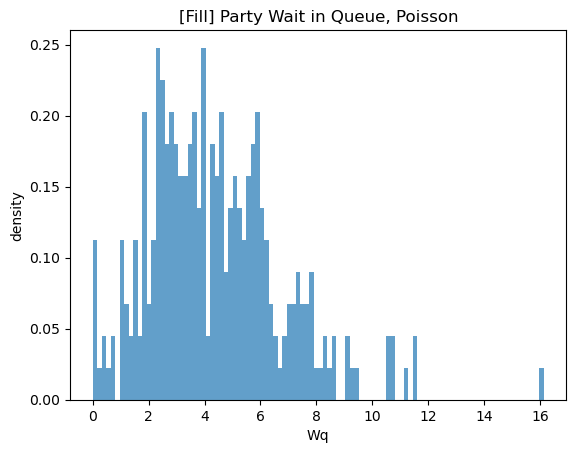

In [20]:
N = 1000

arrivals = rng.uniform(0,5, size=N)
sizes = PoissonClean(N,L)

avg_waits,weight,lines,parties = CreatePartyFill(arrivals,sizes)

plt.figure()
plt.hist(avg_waits, bins=100, density=True, alpha=0.7)
plt.xlabel("Wq"); plt.ylabel("density"); plt.title("[Fill] Party Wait in Queue, Poisson")
#plt.xlim(0, 50)

s = pd.Series(avg_waits)
s.describe()

party_sample_pois = s

### Repeated N=1000 Poisson Fill Trials by Individual

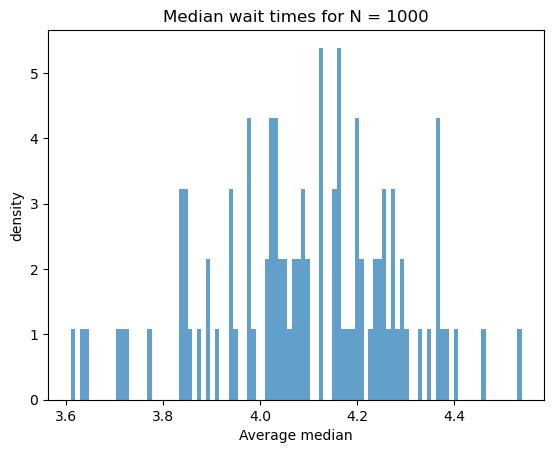

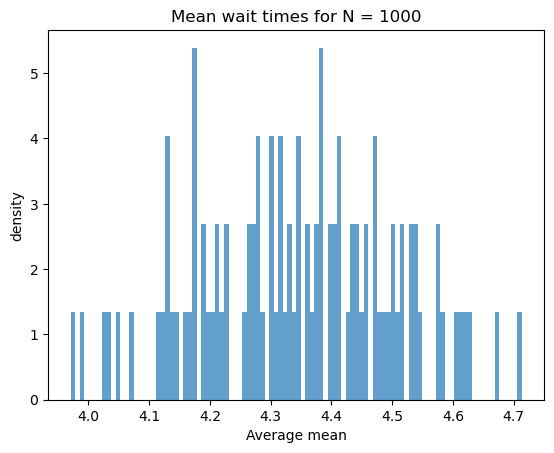

In [21]:
N = 1000
means = []
medians = []

for i in range(100):
    arrivals = rng.uniform(0,5, size=N)
    sizes = PoissonClean(N,L)

    avg_waits,weight,dfl,parties = CreatePartyFill(arrivals,sizes)

    s = pd.Series(avg_waits)
    means.append(s.describe()[1])
    medians.append(s.describe()[5])


plt.figure()
plt.hist(medians, bins=100, density=True, alpha=0.7)
plt.xlabel("Average median"); plt.ylabel("density"); plt.title("Median wait times for N = 1000")

plt.figure()
plt.hist(means, bins=100, density=True, alpha=0.7)
plt.xlabel("Average mean"); plt.ylabel("density"); plt.title("Mean wait times for N = 1000")

party_means_pois = pd.Series(means)
party_meds_pois = pd.Series(medians)

### Fill Test when N = 1000 Poisson by Individual

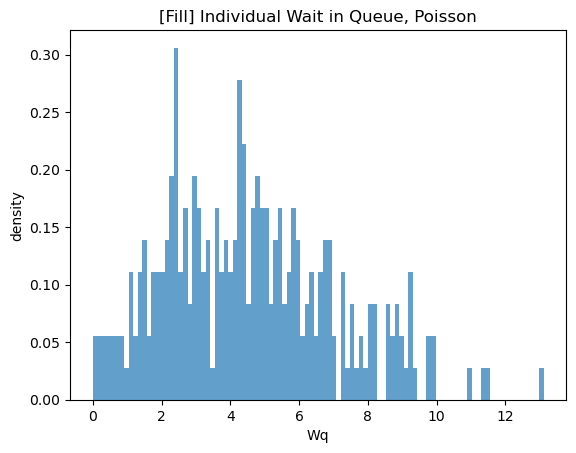

In [22]:
N = 1000

arrivals = rng.uniform(0,5, size=N)
sizes = PoissonClean(N,L)

avg_waits,weight,lines,parties = CreatePartyFill(arrivals,sizes)

plt.figure()
plt.hist(avg_waits, bins=100, density=True, alpha=0.7)
plt.xlabel("Wq"); plt.ylabel("density"); plt.title("[Fill] Individual Wait in Queue, Poisson")
#plt.xlim(0, 50)

s = pd.Series(weight)
s.describe()

ind_sample_pois = s

### Repeated N=1000 Poisson Fill Trials by Individual

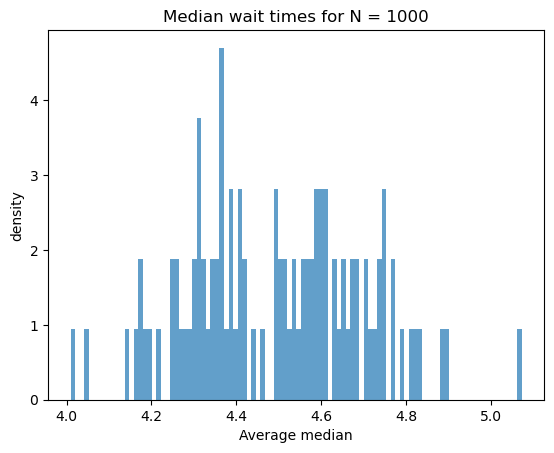

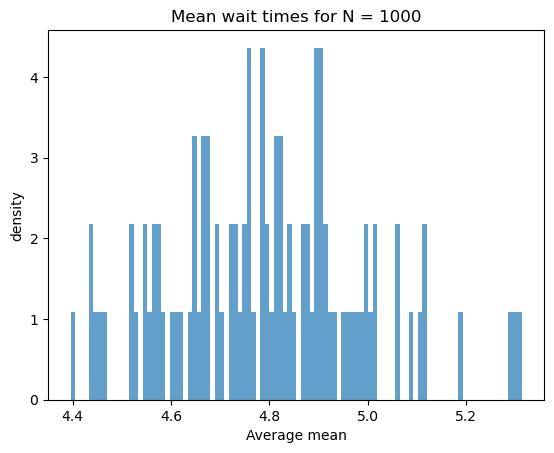

In [23]:
N = 1000
means = []
medians = []

for i in range(100):
    arrivals = rng.uniform(0,5, size=N)
    sizes = PoissonClean(N,L)

    avg_waits,weight,lines,parties = CreatePartyFill(arrivals,sizes)

    s = pd.Series(weight)
    means.append(s.describe()[1])
    medians.append(s.describe()[5])


plt.figure()
plt.hist(medians, bins=100, density=True, alpha=0.7)
plt.xlabel("Average median"); plt.ylabel("density"); plt.title("Median wait times for N = 1000")

plt.figure()
plt.hist(means, bins=100, density=True, alpha=0.7)
plt.xlabel("Average mean"); plt.ylabel("density"); plt.title("Mean wait times for N = 1000")

ind_means_pois = pd.Series(means)
ind_meds_pois = pd.Series(medians)

## Conclusion

In [25]:
print(party_sample_pois.describe())
print()
print("Average party mean across 100 trials:",party_means_pois.mean())
print("Average party median across 100 trials:",party_meds_pois.mean())
print()
print(ind_sample_pois.describe())
print()
print("Average individual mean across 100 trials:",ind_means_pois.mean())
print("Average individual median across 100 trials:",ind_meds_pois.mean())

count    275.000000
mean       4.379588
std        2.410637
min        0.000000
25%        2.636681
50%        4.005127
75%        5.774540
max       16.138076
dtype: float64

Average party mean across 100 trials: 4.343928195533694
Average party median across 100 trials: 4.094595311795262

count    274.000000
mean       5.065706
std        2.981278
min        0.000000
25%        2.872858
50%        4.729424
75%        6.713828
max       15.740457
dtype: float64

Average individual mean across 100 trials: 4.794799741495239
Average individual median across 100 trials: 4.494520780992251


In [58]:
# Testing

arrivals = rng.uniform(0,5, size=1000)
sizes = PoissonClean(1000,1)
#print(sizes)

avg_waits,weight,lines,parties = CreatePartyFill(arrivals,sizes)

'''print("paired teams:")
for p in parties:
    print('[',end=' ')
    for x in p:
        print(x[1],end=' ')
    print(']')

print("unpaired teams:")
for l in lines:
    print('[',end=' ')
    for x in l:
        print(x[1],end=' ')
    print(']')'''

print(len(parties))
print(len(lines))


275
1
